In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet
from datetime import datetime

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path ="C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 결론
1. 상승과 하락을 반복할 가능성이 높음
2. 웹사이트를 개선한다면 상승시기에서 높은 성과를 만들 수도 있음
3. 하지만 주기적인 관리가 없다면 중단하는 것이 더 큰 피해를 막을 수 있을 것으로 보임 

In [2]:
web_df1 = pd.read_excel('../data/sci.xlsx', sheet_name=0)
web_df2 = pd.read_excel('../data/sci.xlsx', sheet_name=1)
web_df3 = pd.read_excel('../data/sci.xlsx', sheet_name=2)

In [3]:
web_df1.head()

,등록일,분류,콘텐트타입,조회수
0,2014-01-01,FUSION,일반,5328
1,2014-01-06,FOCUS,일반,3503
2,2014-01-08,FUSION,NaN,3462
3,2014-01-13,FOCUS,일반,5892
4,2014-01-15,FUNNY,만화,4750


In [4]:
web_df2.head()

,등록일,분류,콘텐트타입,조회수
0,2013-01-02,FUSION,일반,36025
1,2013-01-07,FOCUS,일반,4987
2,2013-01-09,FUSION,일반,42971
3,2013-01-14,FOCUS,일반,99201
4,2013-01-16,FUNNY,만화,10132


In [5]:
web_df3.head()

,등록일,분류,콘텐트타입,조회수
0,2012-01-02,FUSION,일반,13613
1,2012-01-02,FOCUS,일반,67983
2,2012-01-09,FUNNY,만화,9613
3,2012-01-09,FUSION,인물,7257
4,2012-01-16,FUNNY,실험,4333


In [6]:
concat_df = pd.concat([web_df1, web_df2, web_df3])
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 104
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   등록일     247 non-null    datetime64[ns]
 1   분류      247 non-null    object        
 2   콘텐트타입   240 non-null    object        
 3   조회수     247 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 9.6+ KB


In [7]:
web_df = concat_df.sort_values(by='등록일')

<AxesSubplot:xlabel='등록일'>

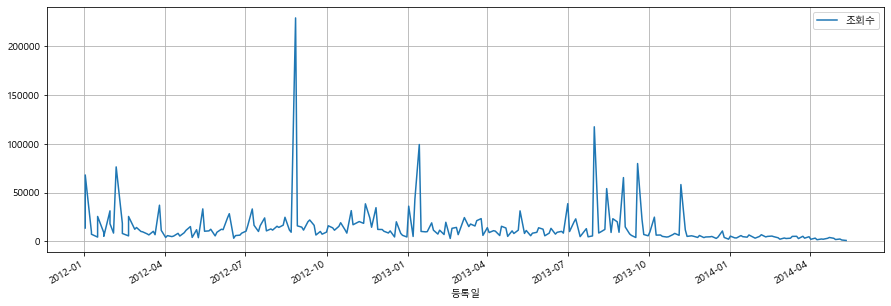

In [15]:
web_df.plot(x='등록일', y='조회수',figsize=(15, 5), grid=True)

In [16]:
time = np.arange(0, len(web_df))
traffic = web_df['조회수'].values

fx = np.linspace(0, time[-1], 1000)
print(fx)

[  0.           0.24624625   0.49249249   0.73873874   0.98498498
   1.23123123   1.47747748   1.72372372   1.96996997   2.21621622
   2.46246246   2.70870871   2.95495495   3.2012012    3.44744745
   3.69369369   3.93993994   4.18618619   4.43243243   4.67867868
   4.92492492   5.17117117   5.41741742   5.66366366   5.90990991
   6.15615616   6.4024024    6.64864865   6.89489489   7.14114114
   7.38738739   7.63363363   7.87987988   8.12612613   8.37237237
   8.61861862   8.86486486   9.11111111   9.35735736   9.6036036
   9.84984985  10.0960961   10.34234234  10.58858859  10.83483483
  11.08108108  11.32732733  11.57357357  11.81981982  12.06606607
  12.31231231  12.55855856  12.8048048   13.05105105  13.2972973
  13.54354354  13.78978979  14.03603604  14.28228228  14.52852853
  14.77477477  15.02102102  15.26726727  15.51351351  15.75975976
  16.00600601  16.25225225  16.4984985   16.74474474  16.99099099
  17.23723724  17.48348348  17.72972973  17.97597598  18.22222222
  18.4684684

In [17]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [18]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
print(f1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

 
-50.61 x + 2.025e+04
19639.048472928906
19408.25936574798
19383.634863880194
18837.00105449019


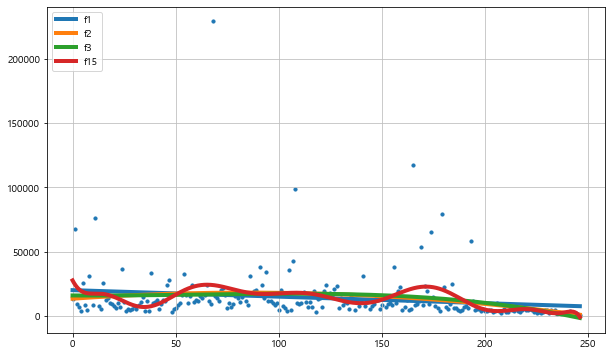

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [20]:
df = pd.DataFrame({'ds': web_df['등록일'], 'y':web_df['조회수']})
df.reset_index(inplace=True)

In [21]:
df.head()

,index,ds,y
0,0,2012-01-02,13613
1,1,2012-01-02,67983
2,2,2012-01-09,9613
3,3,2012-01-09,7257
4,4,2012-01-16,4333


In [22]:
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
df.head()

,index,ds,y
0,0,2012-01-02,13613
1,1,2012-01-02,67983
2,2,2012-01-09,9613
3,3,2012-01-09,7257
4,4,2012-01-16,4333


In [23]:
df = df.drop(['index'], axis = 1)

In [24]:
df.head()

,ds,y
0,2012-01-02,13613
1,2012-01-02,67983
2,2012-01-09,9613
3,2012-01-09,7257
4,2012-01-16,4333


In [25]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

18:19:40 - cmdstanpy - INFO - Chain [1] start processing
18:19:40 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
295,2014-07-07
296,2014-07-08
297,2014-07-09
298,2014-07-10
299,2014-07-11


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
295,2014-07-07,8210.468860,-16930.822062,30327.271979
296,2014-07-08,5562.027354,-20752.734086,28382.080347
297,2014-07-09,7975.361618,-15721.693800,32362.178608
298,2014-07-10,6623.883564,-15196.889406,30582.923278
299,2014-07-11,5092.412038,-18468.195007,30403.449069


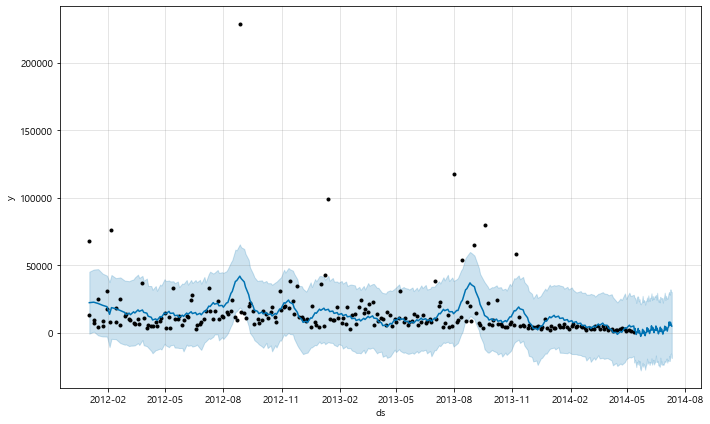

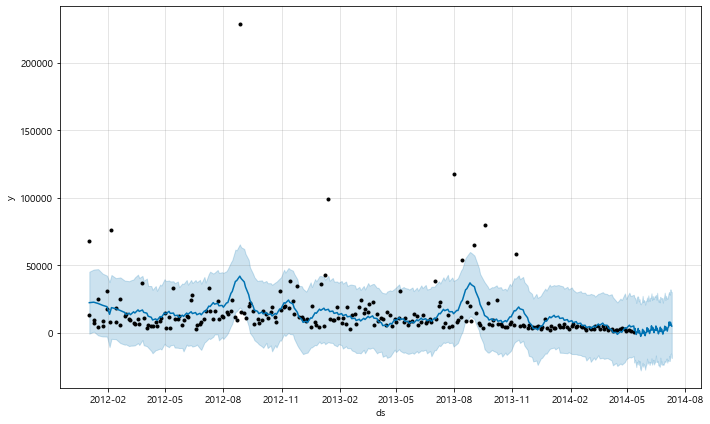

In [28]:
m.plot(forecast)

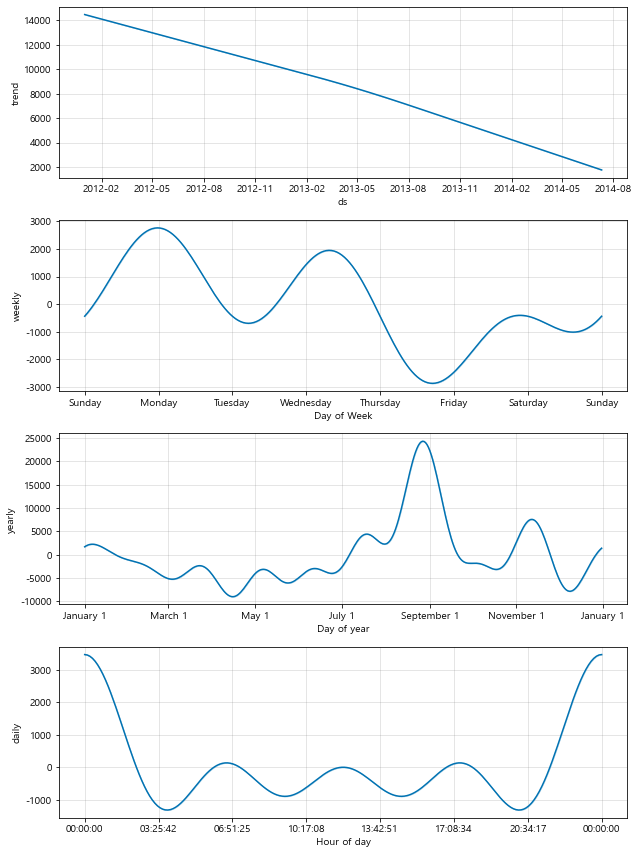

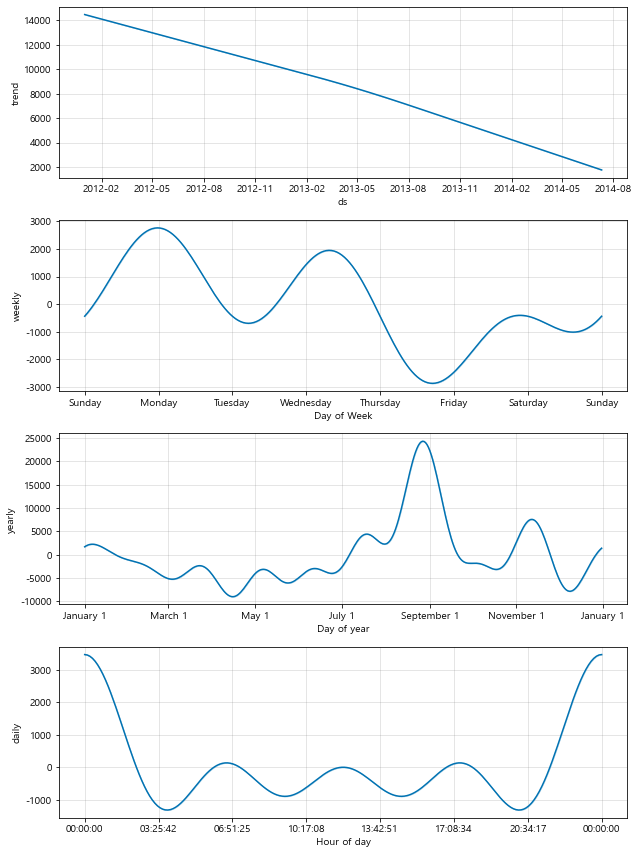

In [29]:
m.plot_components(forecast)

# =================

2. 시계열 데이터 분석 : 삼성 주식을 분석하세요. (005930.KS) or 관심주

1) 2020.01.01~ 2021.12.31일 까지의 시세를 확인하세요.

2) 1)의 기간의 종가(Close)를 기준으로 그래프를 그려 보세요.

3) 1년 후, 2022.12.31일 까지의 정보를 예측해 보세요.

4) 700일 간의 데이터를 예측해 보세요.
실제 데이터와 예측값을 그래프로 그려 보세요.

In [32]:
from pandas_datareader import data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,51557.585938
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,51837.796875
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,51837.796875
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52118.000000
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53052.019531
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,70428.789062
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,74145.585938
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,75003.328125


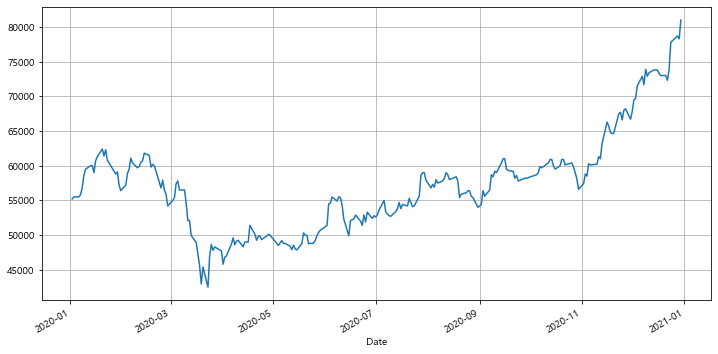

In [3]:
start_date = '2020-1-1' 
end_date = '2020-12-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM['Close'].plot(figsize=(12,6), grid=True);
SAM_trunc = SAM[:'2020-12-31'] 
SAM_trunc

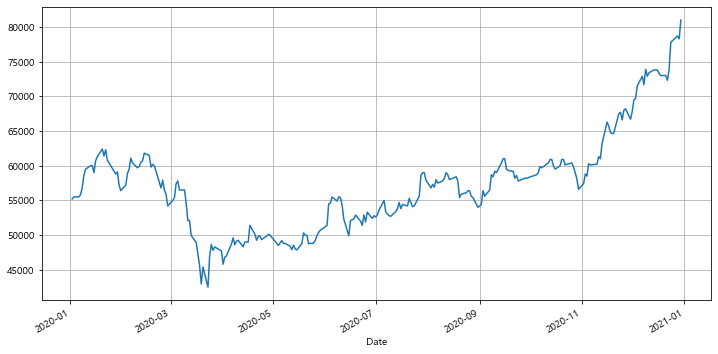

In [4]:
SAM_trunc = SAM[:'2020-12-31']
SAM_trunc['Close'].plot(figsize=(12,6), grid=True);

In [41]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [42]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

18:27:18 - cmdstanpy - INFO - Chain [1] start processing
18:27:18 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
943,2022-11-26,123328.930013,121582.498290,124884.579193
944,2022-11-27,123798.093553,122121.573967,125402.385821
945,2022-11-28,122513.162200,120791.071020,124351.947969
946,2022-11-29,123133.414653,121411.260829,124751.640619
947,2022-11-30,123716.297114,122114.077256,125469.539104


In [44]:
future = m.make_future_dataframe(periods=700)
future.tail()

,ds
943,2022-11-26
944,2022-11-27
945,2022-11-28
946,2022-11-29
947,2022-11-30


In [16]:
future = m.predict(future)

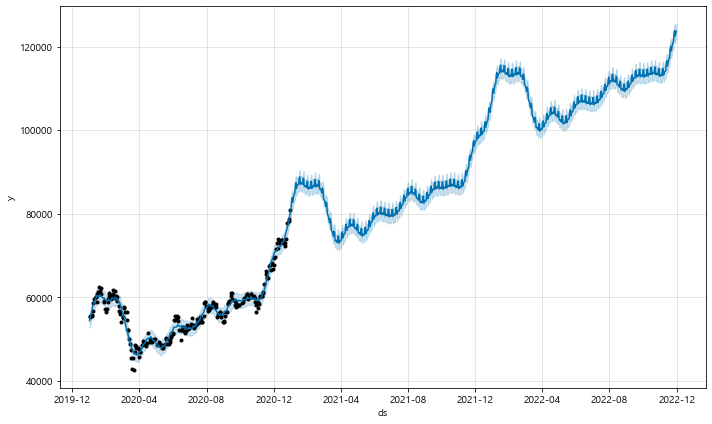

In [17]:
m.plot(forecast);

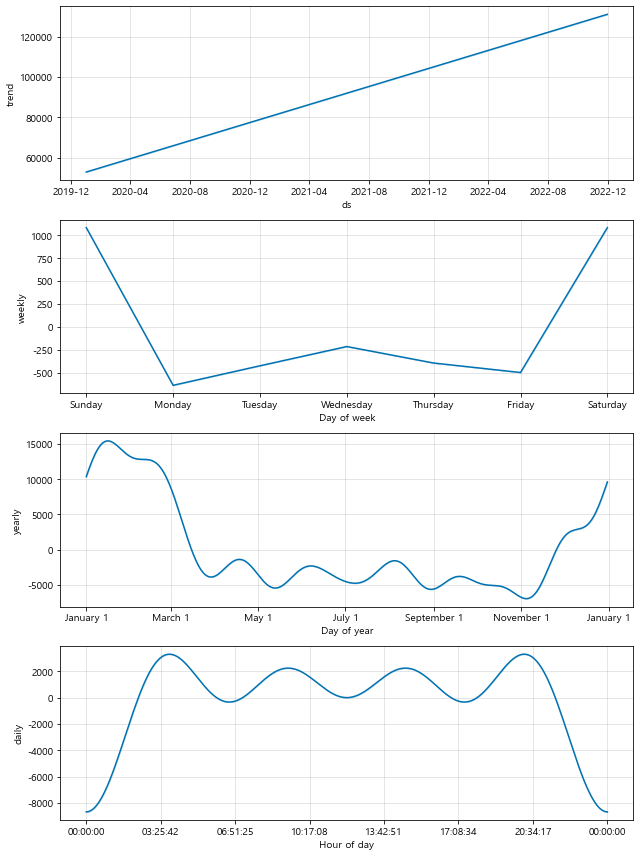

In [18]:
m.plot_components(forecast);

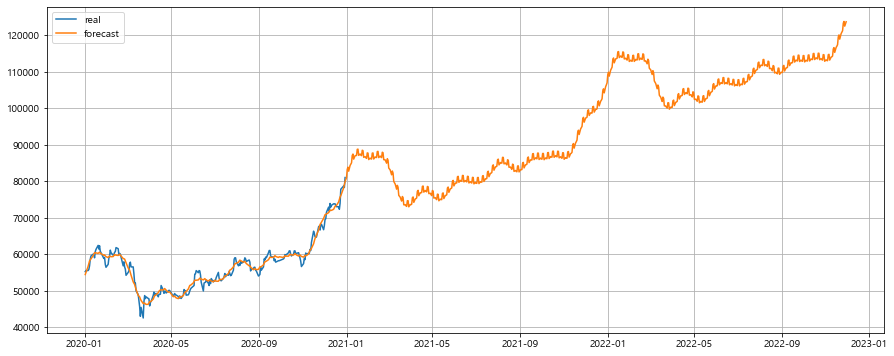

In [21]:
plt.figure(figsize=(15,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

1) 2020.01.01~ 2022.6.30일 까지의 시세를 확인하세요.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,51557.593750
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,51837.792969
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,51837.792969
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52118.003906
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53052.015625
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,70428.789062
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,74145.601562
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,75003.328125


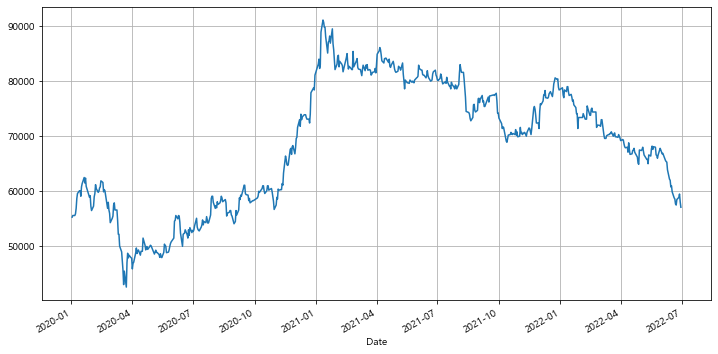

In [33]:
start_date = '2020-1-1' 
end_date = '2022-6-30' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM['Close'].plot(figsize=(12,6), grid=True);
SAM_trunc = SAM[:'2020-12-31'] 
SAM_trunc

In [34]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [35]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

18:25:49 - cmdstanpy - INFO - Chain [1] start processing
18:25:49 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future = m.make_future_dataframe(periods=700)
future.tail()

,ds
943,2022-11-26
944,2022-11-27
945,2022-11-28
946,2022-11-29
947,2022-11-30


In [39]:
future = m.predict(future)

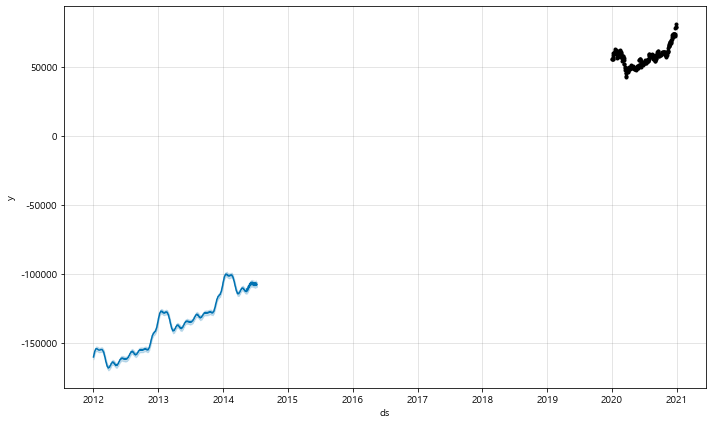

In [40]:
m.plot(forecast);

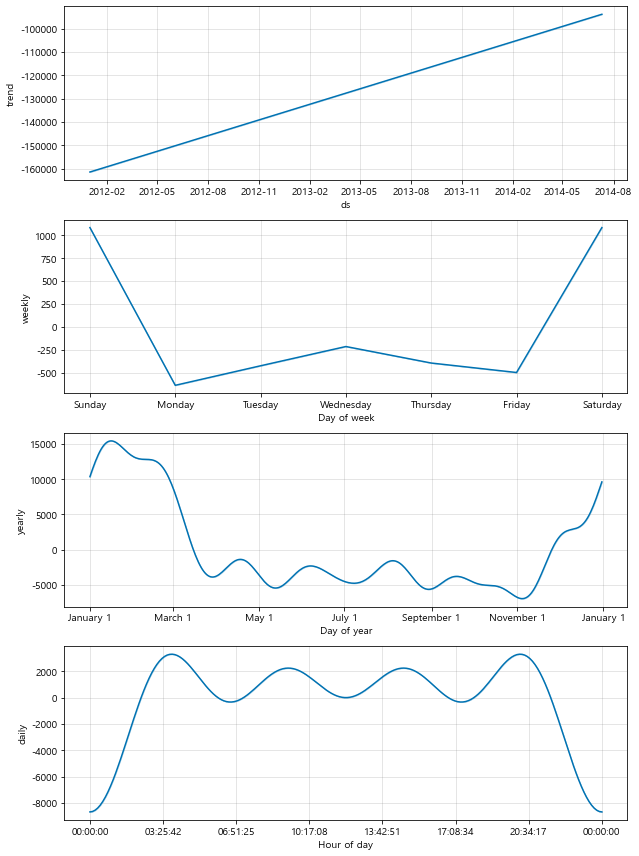

In [38]:
m.plot_components(forecast);